In [2]:
%matplotlib inline


# Histogram Equalization


This examples enhances an image with low contrast, using a method called
*histogram equalization*, which "spreads out the most frequent intensity
values" in an image [1]_. The equalized image has a roughly linear cumulative
distribution function.

While histogram equalization has the advantage that it requires no parameters,
it sometimes yields unnatural looking images.  An alternative method is
*contrast stretching*, where the image is rescaled to include all intensities
that fall within the 2nd and 98th percentiles [2]_.

.. [1] https://en.wikipedia.org/wiki/Histogram_equalization
.. [2] http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm


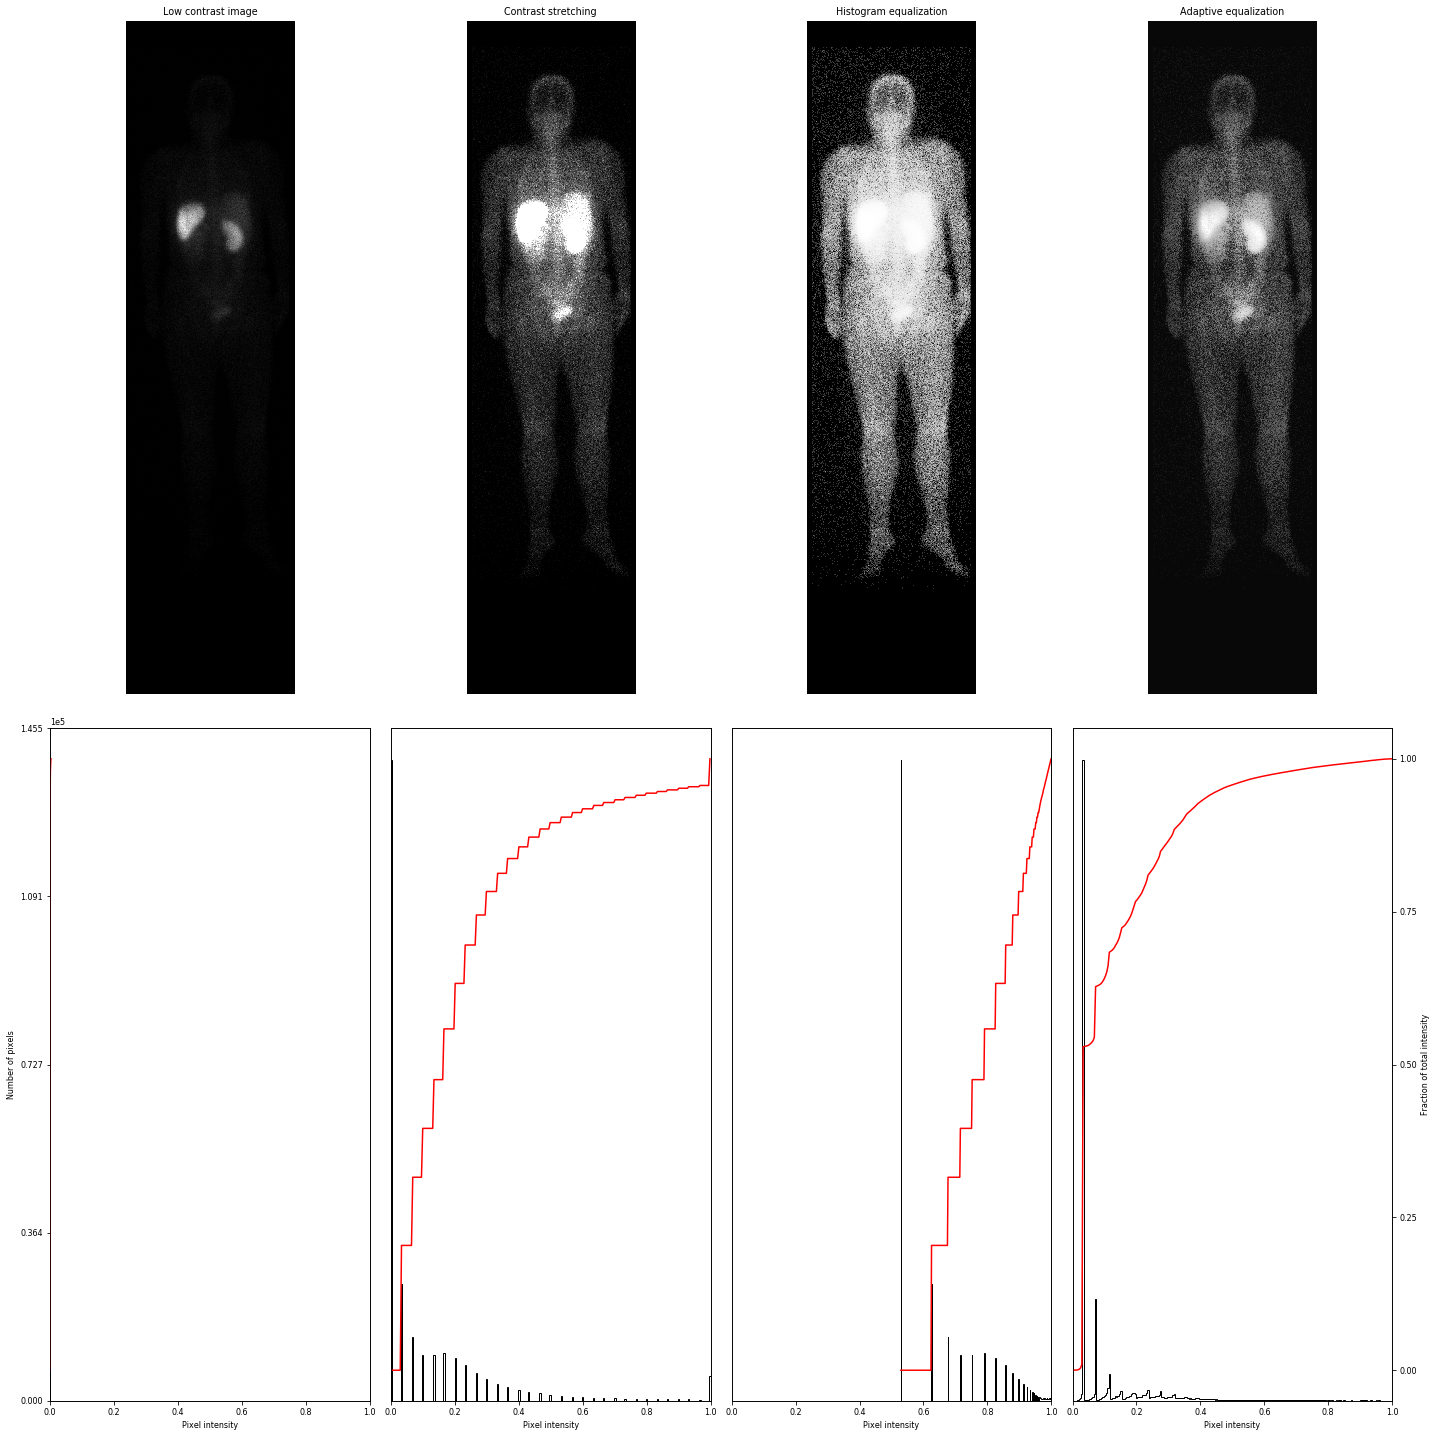

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

import pydicom
matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
#img = data.moon()
img=pydicom.dcmread("./dataset/15h/POST_EM.dcm").pixel_array

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.04)

# Display results
fig = plt.figure(figsize=(20, 20))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [6]:
import PIL

In [4]:
imagen=PIL.Image.fromarray(img,mode='I;16')

NameError: name 'PIL' is not defined

In [22]:
PIL.Image.Image.save(imagen,'imagen.tiff',mode='I;16')

In [9]:
import cv2

In [29]:
prueba=cv2.imread("imagen.tiff")

In [34]:
prueba[670,130]

array([0, 0, 0], dtype=uint8)

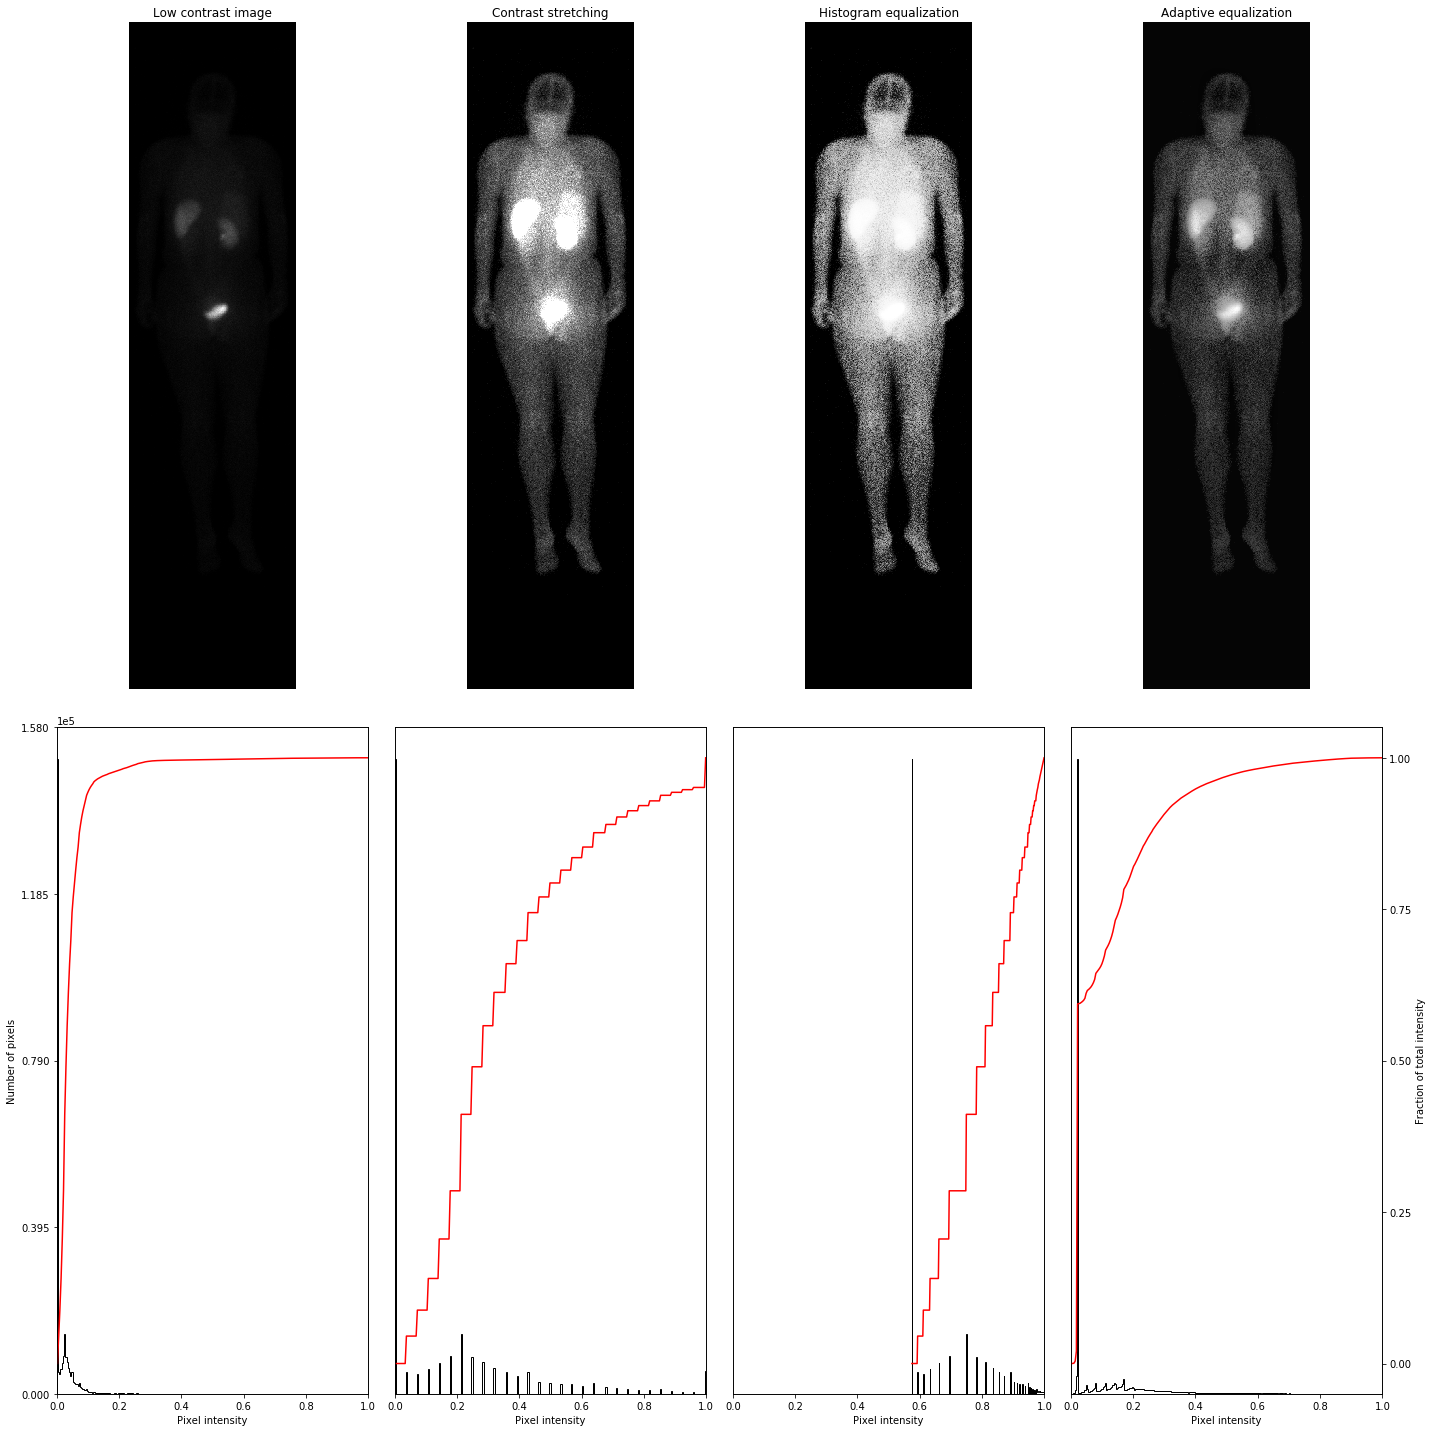

In [6]:
# Load an example image
#img = data.moon()
img=Image[:,:,0]

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(20, 20))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [5]:
def DicomtoRGB(dicomfile,bt,wt):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((dicomfile.Rows, dicomfile.Columns, 3), np.uint8)
    #loops on image height and width
    i=0
    j=0
    while i<dicomfile.Rows:
        j=0
        while j<dicomfile.Columns:
            color = yaxpb(dicom_file.pixel_array[i][j],bt,wt) #linear transformation to be adapted
            image[i][j] = (color,color,color)## same R,G, B value to obtain greyscale
            j=j+1
        i=i+1
    return image
##linear transformation : from [bt < pxvalue < wt] linear to [0<pyvalue<255]: loss of information... 
def yaxpb(pxvalue,bt,wt):
    if pxvalue <= bt-0.5-(wt-1)/2:
        y=0
    elif pxvalue > bt-0.5+(wt-1)/2:
        y=255
    else:
        y=(((pxvalue-(bt-0.5))/(wt-1))+0.5)*255
    return y
    

dicom_file = pydicom.dcmread("./dataset/1h/POST_EM.dcm")
wt = dicom_file.WindowWidth
bt = dicom_file.WindowCenter
Image=DicomtoRGB(dicom_file,bt,wt)


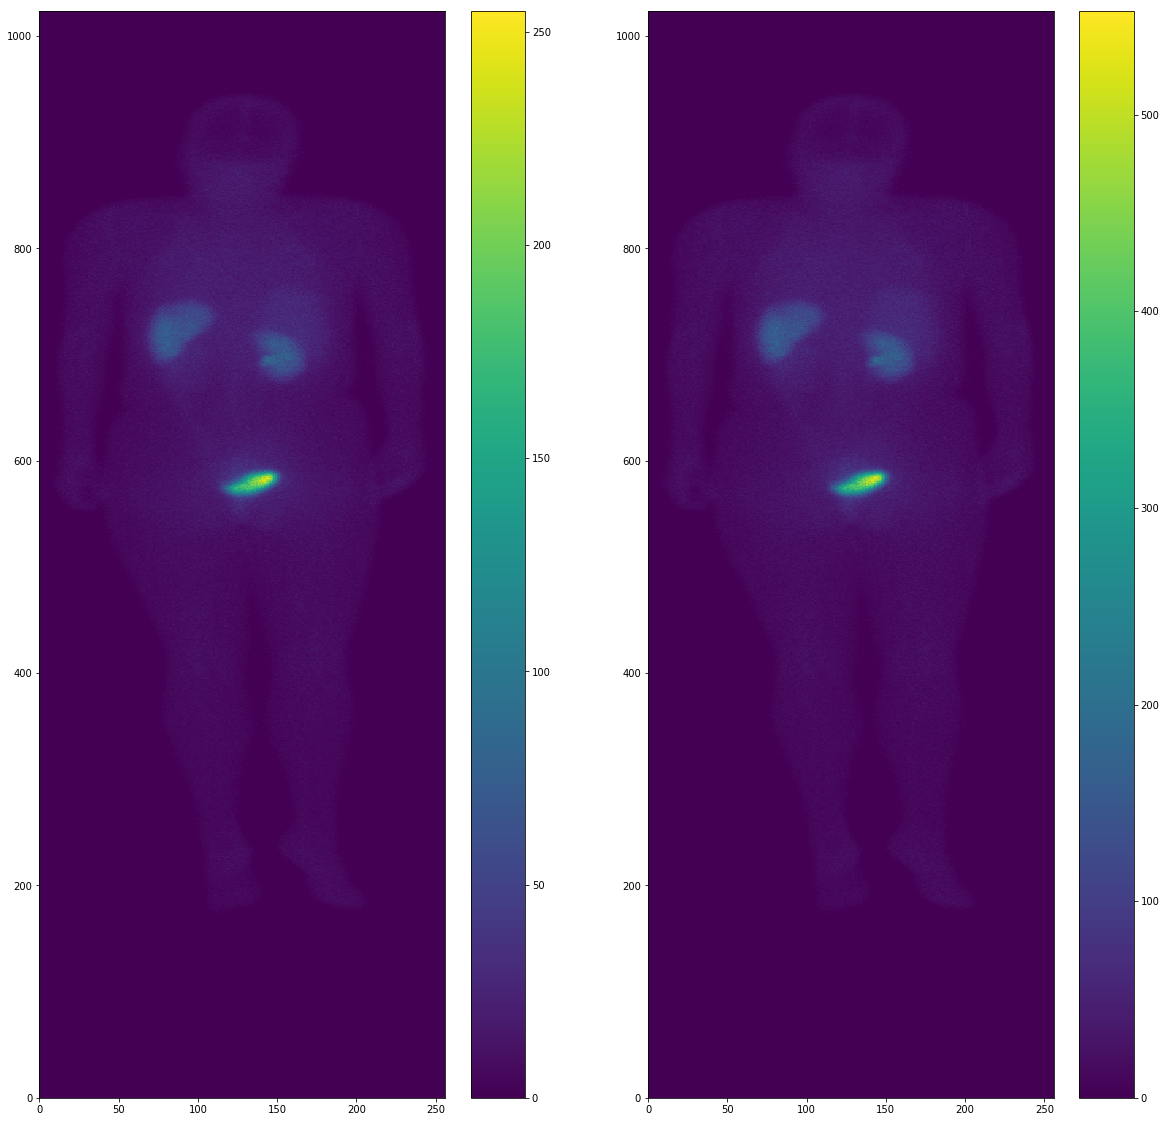

In [7]:
plt.figure(2,figsize=(20, 20))
plt.subplot(1,2,1)
plt.pcolormesh(np.flipud(Image[:,:,0]))
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolormesh(np.flipud(dicom_file.pixel_array))
plt.colorbar()

In [38]:
dicom_file.

0

In [47]:
cv2

<module 'cv2.cv2' from '/home/fidel/anaconda3/envs/diplodatos/lib/python3.6/site-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so'>

In [11]:
imgray = cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,60,80,0)

In [12]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

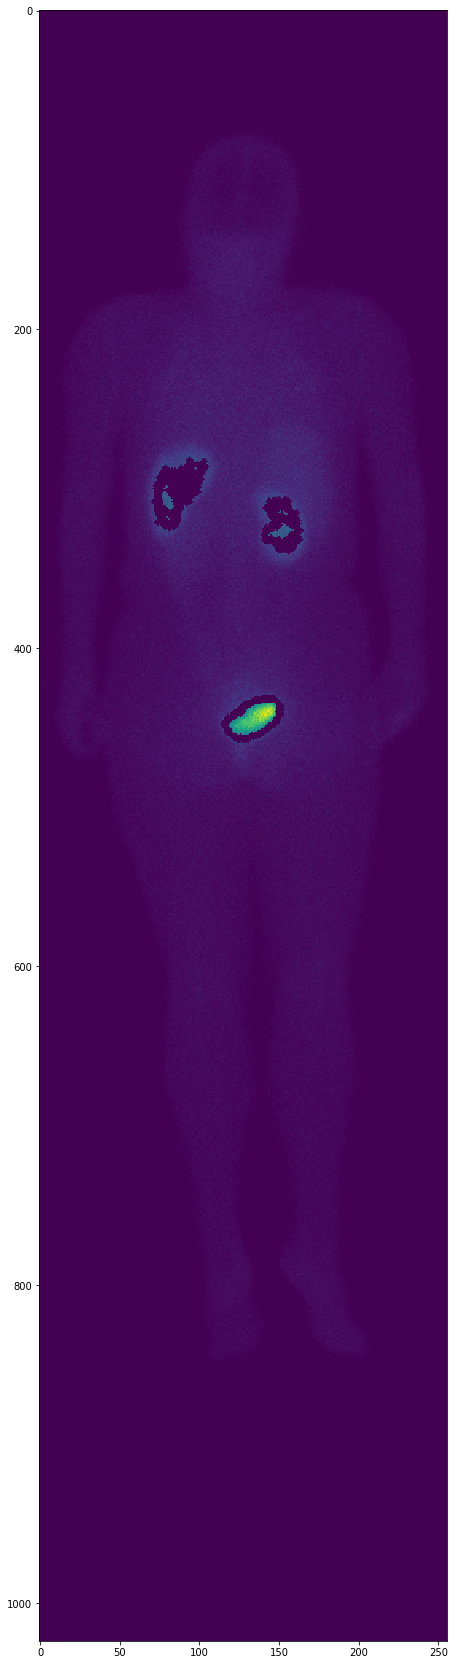

In [14]:
plt.figure(figsize=(30,30))
plt.imshow(cv2.drawContours(imgray, contours, -1, (0,255,0), 3))

In [76]:
cv2.imshow("peuba",imgray)

In [15]:
dicom_file

(0008, 0000) Group Length                        UL: 504
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'WHOLE BODY', 'EMISSION']
(0008, 0012) Instance Creation Date              DA: '20101022'
(0008, 0013) Instance Creation Time              TM: '165638.0000'
(0008, 0014) Instance Creator UID                UI: 1.2.840.113619.6.124
(0008, 0016) SOP Class UID                       UI: Nuclear Medicine Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.124.11330.1024920366.1247500409.78437500
(0008, 0020) Study Date                          DA: '20090713'
(0008, 0021) Series Date                         DA: '20090713'
(0008, 0022) Acquisition Date                    DA: '20090713'
(0008, 0023) Content Date                        DA: '20090713'
(0008, 0030) Study Time                          TM: '103711.00'
(0008, 0031) Series Time                         TM: '170440.00'
(0008, 0032) Acquisition Time                    TM: '